# Структура
1  [Описание](#1)

2  [Задание](#2)

3  [Изучение данных](#3)

* 3.1  [Гистограммы распределения](#31)
* 3.2  [Тепловые карты корреляци](#32)
* 3.3  [Диаграммы рассеяния](#33)
* 3.4  [Сводные таблицы](#34)

4  [Восстановление формулы](#4)

* 4.1  [Доплата за вредность](#41)
* 4.2  [Индивидуальные надбавки](#42)
* 4.3  [Премия и оклад](#43)
* 4.4  [Взаимосвязь окладов](#44)

5  [Итоговая формула](#5)

6  [Проверка](#6)

7  [Заключение](#7)

<a name="1"></a>
## Описание

Вам представлены данные о доходах сотрудников участка горячего проката за год, в том числе данные, описывающие специфику рабочих мест.
Доход состоит из оклада, премии, доплат и индивидуальных надбавок. Данных об их размерах не приводится, так как именно их Вам предстоит восстановить.

<a name="2"></a>
## Задание

* Выявите формулу дохода в целом и его составных частей
* Проверьте, что данная формула объясняет доход с точностью до рубля
* Выявите зависимости между составными частями дохода

Итоговую формулу напишите, пожалуйста, в теле письма или в Word. Все расчеты и объяснения приложите отдельным файлом.

**Комментарий**
Прежде чем использовать Python посмотрел данные в excel. Что ясно:
* 2400 строк
* Для сотрудников помесячно (за 12 месяцев 2009 года) приведены данные:
  * FIO
  * Месяц
  * Профессия
  * Разряд
  * Оборудование
  * Вредность (балл.)
  * Объем производства
  * Доход
* 1 или несколько значимых столбцов отсутствуют (т.к. для 2 разных сотрудников с полностью идентичными показателями доход может отличаться) *вероятно это и есть "индивидуальные надбавки"*

*В описании на hh.ru почему-то не упоминается стек необходимых инструментов*

Чуть "поковырявшись" можно найти закономерности иcключительно средствами Excel, но буду считать что владение Python входит в необходимый минимум для Data Scientist. Более объемный/сложный набор данных разобрать методом "присталного взгляда" уже может не получиться. Плюс дополнительная практика.

*Не забыть приложить ссылку на nbviewer.org на случай отсутствия Jupiter у получателя*

Часть промежуточных выводов не иллюстрирую кодом и визуализацией чтобы "не перегружать" блокнот.

До обнаружения иного считаю что сотрудники в течении года не получают разряды, не меняют участок (оборудование) и профессию.

<a name="3"></a>
## Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

from IPython.display import display

In [2]:
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

sns.set(rc={'figure.figsize':(16, 6)})
sns.set_style('whitegrid')

In [3]:
def сoef_determ(row):
    '''
    получает строку (разряд и доход_минус_вред), ранжирует
    возвращает соответствующий коэффициент надбавки
    '''
    _rank = row['разряд'] 
    _val= row['доход_минус_вред']
    _list = jan_class_list.loc[_rank, 'список_значений']
    _list.sort(reverse=False)
    _num = _list.index(_val)
    return 1+_num*0.05

def income_calc(row):
    '''
    получает строку (фио, разряд, вредность, объем),
    "дергает" из workers_list соответствкющий фио коэф_надбавки (восстановлен ранее)
    возвращает расчетный доход
    '''
    _fio = row['фио'] 
    _rank = row['разряд']
    _harm = row['вредность']
    _vol = row['объем']
    
    _coef = workers_list.loc[_fio, 'коэф_надбавки']
    
    _salary = math.ceil(12180*(1.16**(_rank-3))/10)*10 #оклад
    _premium = _salary*(_vol-850)/1700 #премия
    if _premium<0: _premium = 0
    _bonus = (_salary + _premium)*(_coef-1)
    _additional = _harm*180
    _income = _salary + _premium + _bonus + _additional
    
    return _income

In [4]:
df = pd.read_excel('Задание 5.0 2 версия.xlsx')

In [5]:
df

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588
...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000
2398,Яковлев Д. И.,2009-11-01,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000


In [6]:
df.info()
print()
print('Дубликатов:', df.duplicated().sum())
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FIO                 2400 non-null   object        
 1   Месяц               2400 non-null   datetime64[ns]
 2   Профессия           2400 non-null   object        
 3   Разряд              2400 non-null   int64         
 4   Оборудование        2400 non-null   object        
 5   Вредность (балл.)   2400 non-null   int64         
 6   Объем производства  2400 non-null   int64         
 7   Доход               2400 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 150.1+ KB

Дубликатов: 0



,Разряд,Вредность (балл.),Объем производства,Доход
count,2400.000000,2400.000000,2400.000000,2400.000000
mean,4.900000,15.785000,988.333333,21665.570570
std,1.371417,6.567857,230.982220,4686.885527
min,3.000000,0.000000,580.000000,12180.000000
25%,4.000000,14.750000,805.000000,18076.500000
50%,5.000000,18.000000,985.000000,21057.300000
75%,6.000000,19.000000,1185.000000,25105.764706
max,7.000000,22.000000,1400.000000,36076.764706


In [7]:
#Переименуем столбцы для удобства
df.set_axis(['фио', 'месяц', 'профессия', 'разряд', 'оборудование', 'вредность', 'объем', 'доход'], axis=1, inplace=True)

In [8]:
cat_col = df.select_dtypes(include=object).columns
for col in cat_col:
    print('Кол-во уникальных значений столбца', col, ':', df[col].nunique())

Кол-во уникальных значений столбца фио : 200
Кол-во уникальных значений столбца профессия : 9
Кол-во уникальных значений столбца оборудование : 9


<a name="31"></a>
### Гистограммы распределения

<ipython-input-9-eb0a587f27f1>:12: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfxx = ser.describe().to_frame().round(2)


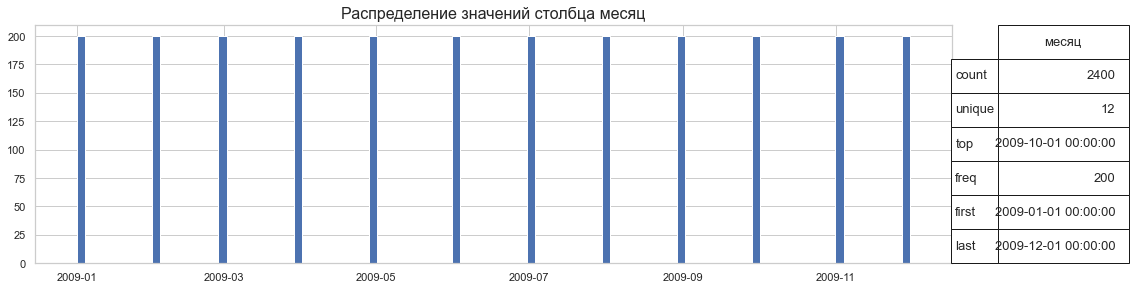

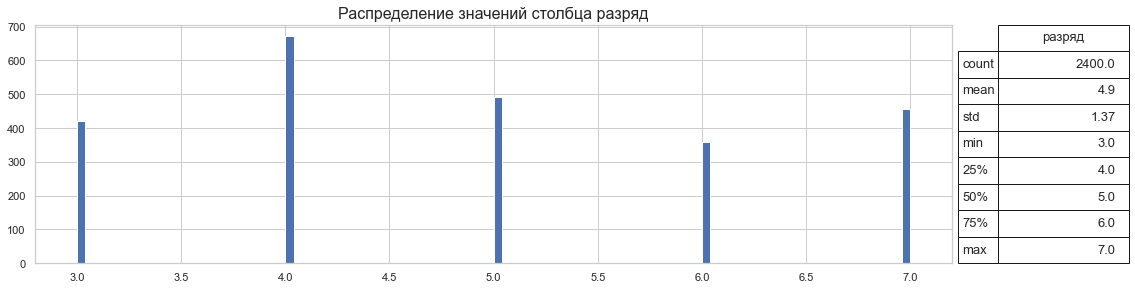

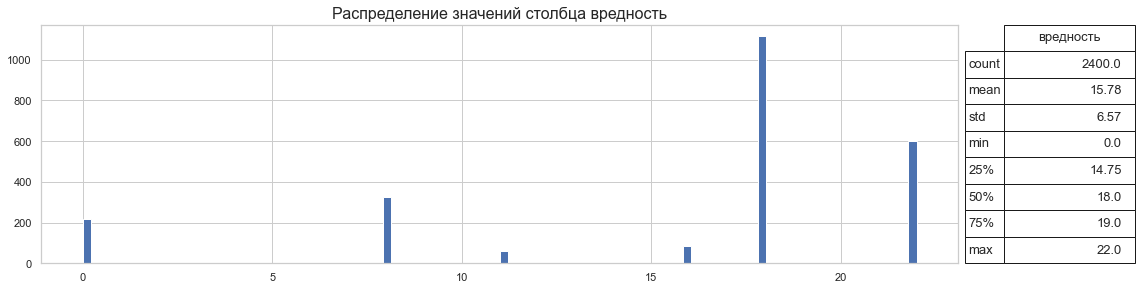

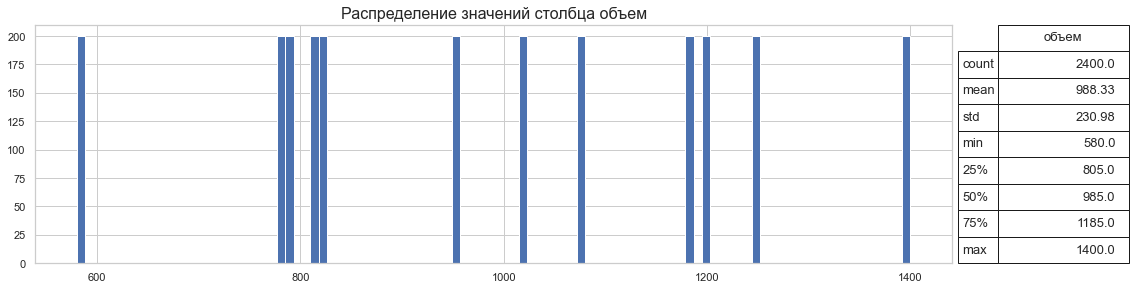

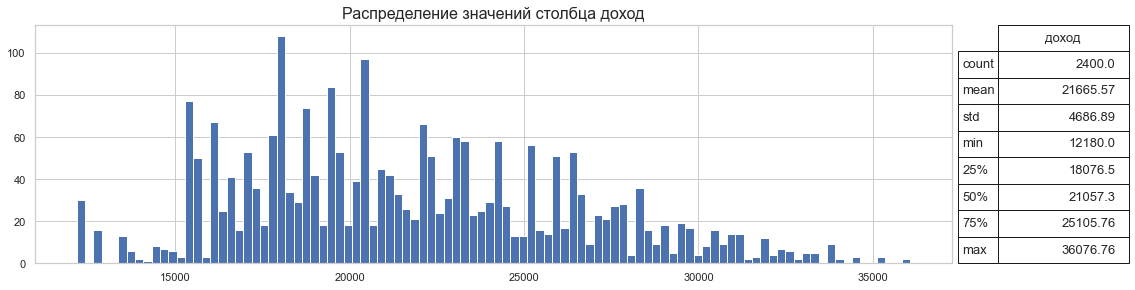

In [9]:
nocat_col = df.select_dtypes(exclude=object).columns

for col in nocat_col:
    ser = df[col]
    
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [7, 1]}, figsize=(16,4))
    fig.tight_layout()
    
    ax[0].hist(ser, bins=100)
    ax[0].set_title('Распределение значений столбца ' + ser.name, fontsize=16)
    
    dfxx = ser.describe().to_frame().round(2)
    ax[1].axis('off')
    mpl_table = ax[1].table(cellText = dfxx.values, rowLabels = dfxx.index, bbox=[0, 0, 1, 1], colLabels=dfxx.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(13)

Все данные за 2009 год. Месяц можно заменить его номером.

In [10]:
df['месяц'] = df['месяц'].dt.month

In [11]:
#df['вредность_разряд'] = df['вредность']*df['разряд']

<a name="32"></a>
### Тепловые карты корреляци

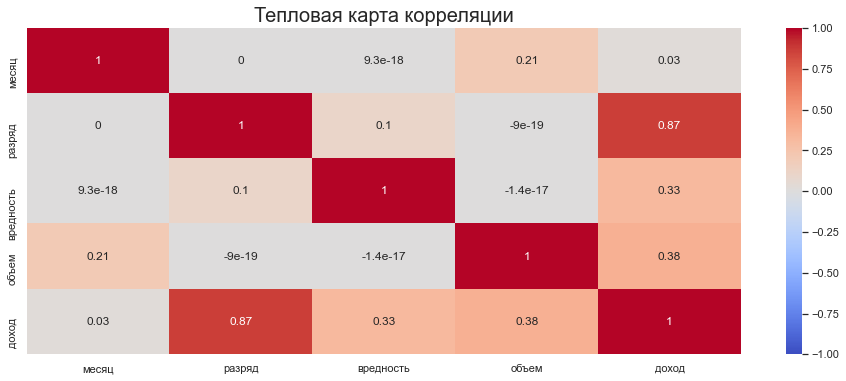

In [12]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.2g')
plt.title('Тепловая карта корреляции', fontsize=20);

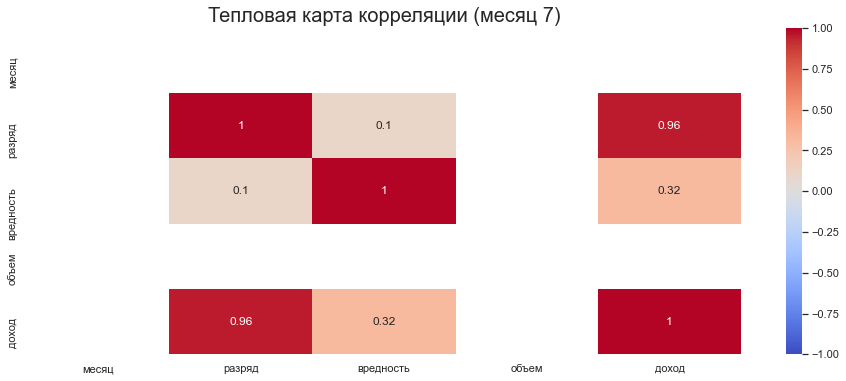

In [13]:
sns.heatmap(df[df['месяц']==7].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt='.2g')
plt.title('Тепловая карта корреляции (месяц 7)', fontsize=20);

<a name="33"></a>
### Диаграммы рассеяния

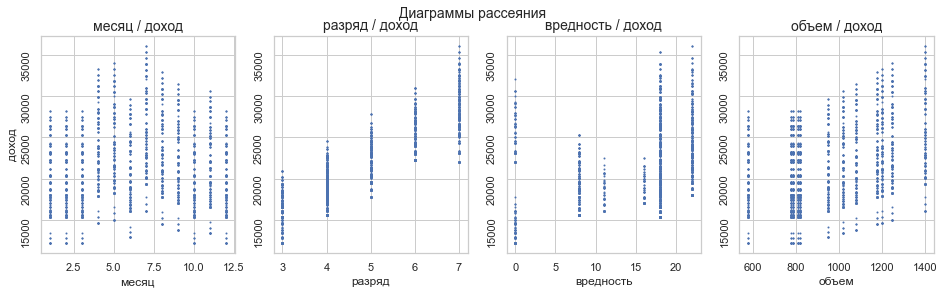

In [14]:
fig, ax = plt.subplots(1, 4, gridspec_kw={'width_ratios': [1, 1, 1, 1]}, figsize=(16,4))
#fig.tight_layout()
fig.suptitle('Диаграммы рассеяния', fontsize=14)

_col_list = ['месяц', 'разряд', 'вредность', 'объем']
for i in range(0, len(_col_list)):
    ax[i].scatter(df[_col_list[i]], df['доход'], s=1)
    ax[i].set_title(_col_list[i] + ' / доход', fontsize=14)
    ax[i].set_xlabel(_col_list[i], fontsize=12)
    ax[i].tick_params(axis='y', rotation=90)
ax[0].set_ylabel('доход', fontsize=12);

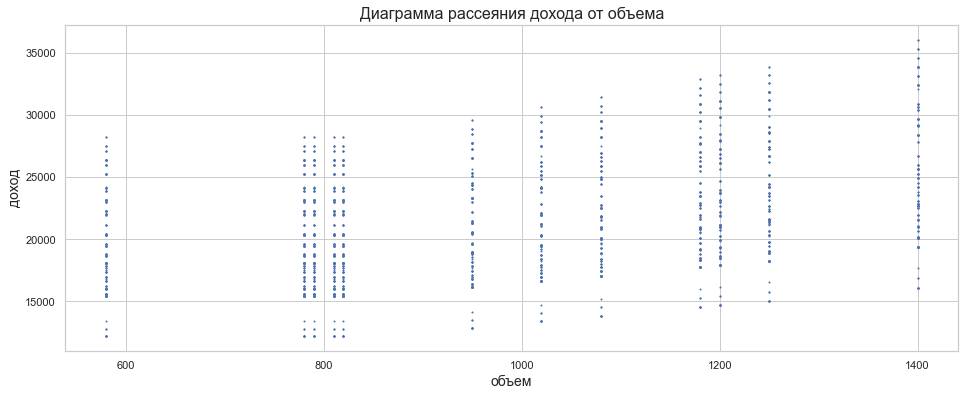

In [15]:
plt.scatter(df['объем'], df['доход'], s=1)
plt.title('Диаграмма рассеяния дохода от объема', fontsize=16)
plt.xlabel('объем', fontsize=14)
plt.ylabel('доход', fontsize=14);

<a name="34"></a>
### Сводные таблицы

In [16]:
#группировка по характеристикам работника
pivot = df.pivot_table(index=['разряд', 'вредность', 'профессия', 'оборудование'], 
                                 columns=['месяц'],
                                 aggfunc={'доход': (min, pd.Series.nunique)})

pivot

доход  \
                                                                                               min   
месяц                                                                                           1    
разряд вредность профессия                            оборудование                                   
3      0         Уборщик                              Вспомогательные помещения            12180.0   
       18        Подручный вальцовщика                Пилигримовые станы                   15420.0   
                 Уборщик                              Пилигримовые станы                   15420.0   
4      8         Оператор поста управления            Калибровочный стан                   15570.0   
       11        Огнеупорщик                          Нагревательные печи                  16110.0   
       16        Резчик горячего металла              Пилигримовые станы                   17010.0   
       18        Подручный вальцовщика                Пилигримовые станы                   17370.0   
                                                      Прошивной стан                       17370.0   
       22        Нагревальщик металла                 Нагревательные печи                  18090.0   
                 Посадчик металла                     Нагревательные печи                  18090.0   
5      8         Оператор поста управления            Калибровочный стан                   17830.0   
                                                      Калибровочный стан, ГРП              17830.0   
       18        Вальцовщик                           Калибровочный стан                   19630.0   
       22        Нагревальщик металла                 Нагревательные печи, кантовка        20350.0   
                                                      Нагревательные печи, нагрев          20350.0   
6      18        Вальцовщик                           Пилигримовые станы                   22260.0   
                                                      Прошивной стан                       22260.0   
       22        Нагревальщик металла                 Нагревательные печи                  22980.0   
7      0         Контролер качества готовой продукции Контрольно-измерительная аппаратура  22060.0   
       18        Вальцовщик                           Пилигримовые станы                   25300.0   
                                                      Прошивной стан                       25300.0   
       22        Нагревальщик металла                 Нагревательные печи                  26020.0   

                                                                                                    \
                                                                                                     
месяц                                                                                           2    
разряд вредность профессия                            оборудование                                   
3      0         Уборщик                              Вспомогательные помещения            12180.0   
       18        Подручный вальцовщика                Пилигримовые станы                   15420.0   
                 Уборщик                              Пилигримовые станы                   15420.0   
4      8         Оператор поста управления            Калибровочный стан                   15570.0   
       11        Огнеупорщик                          Нагревательные печи                  16110.0   
       16        Резчик горячего металла              Пилигримовые станы                   17010.0   
       18        Подручный вальцовщика                Пилигримовые станы                   17370.0   
                                                      Прошивной стан                       17370.0   
       22        Нагревальщик металла                 Нагревательные печи                  18090.0   
                 Посадчик металла                     Нагревательные печи                  18090.0   
5      8    

In [17]:
pivot = df.query('месяц==7').pivot_table(index=['разряд', 'вредность', 'оборудование', 'профессия'], 
                                         columns=['месяц'],
                                         aggfunc={'доход': ('mean', max, min, pd.Series.nunique)})

pivot

доход  \
                                                                                                    max   
месяц                                                                                                 7   
разряд вредность оборудование                        профессия                                            
3      0         Вспомогательные помещения           Уборщик                               17732.647059   
       18        Пилигримовые станы                  Подручный вальцовщика                 20972.647059   
                                                     Уборщик                               20972.647059   
4      8         Калибровочный стан                  Оператор поста управления             21076.544118   
       11        Нагревательные печи                 Огнеупорщик                           22551.617647   
       16        Пилигримовые станы                  Резчик горячего металла               22516.544118   
       18        Пилигримовые станы                  Подручный вальцовщика                 22876.544118   
                 Прошивной стан                      Подручный вальцовщика                 23811.617647   
       22        Нагревательные печи                 Нагревальщик металла                  24531.617647   
                                                     Посадчик металла                      24531.617647   
5      8         Калибровочный стан                  Оператор поста управления             25301.911765   
                 Калибровочный стан, ГРП             Оператор поста управления             25301.911765   
       18        Калибровочный стан                  Вальцовщик                            26017.279412   
       22        Нагревательные печи, кантовка       Нагревальщик металла                  27821.911765   
                 Нагревательные печи, нагрев         Нагревальщик металла                  27821.911765   
6      18        Пилигримовые станы                  Вальцовщик                            30930.882353   
                 Прошивной стан                      Вальцовщик                            30930.882353   
       22        Нагревательные печи                 Нагревальщик металла                  30392.205882   
7      0         Контрольно-измерительная аппаратура Контролер качества готовой продукции  32116.764706   
       18        Пилигримовые станы                  Вальцовщик                            35356.764706   
                 Прошивной стан                      Вальцовщик                            35356.764706   
       22        Нагревательные печи                 Нагревальщик металла                  36076.764706   

                                                                                                         \
                                                                                                   mean   
месяц                                                                                                 7   
разряд вредность оборудование                        профессия                                            
3      0         Вспомогательные помещения           Уборщик                               16478.823529   
       18        Пилигримовые станы                  Подручный вальцовщика                 20051.470588   
                                                     Уборщик                               19629.264706   
4      8         Калибровочный стан                  Оператор поста управления             20357.256787   
       11        Нагревательные печи                 Огнеупорщик                           21242.514706   
       16        Пилигримовые станы                  Резчик горячего металла               21848.634454   
       18        Пилигримовые станы                  Подручный вальцовщика                 22720.698529   
                 Прошивной стан                      Подручный вальцовщика                 22689.529412   
       22        Нагревательные

**Промежуточные выводы:**
* Объем производства  
Показатель является характеристикой предприятия по результатам месяца, а не конкретного сотрудника.  
В месяцы с низкими значениями объема производства (месяцы 1, 2, 3, 10, 12) доход каждого сотрудника одинаков и вероятно соответствует базовому окладу (зависит от разряда). При превышении базовой линии (условного "плана") доход пропорционально  увеличивается (вероятно "премия")
* Оборудование и профессия  
в сочетании дают показатель вредности и сами по себе не значимы
* Для каждого сочетания разряд/вредность есть 2 или 3 немного отличающихся значения дохода (+/- 1000-1500). Вероятно это индивидуальные надбавки, например за выслугу лет.


<a name="4"></a>
## Восстановление формулы

<a name="41"></a>
### Доплата за вредность
Как отличается доход "одноразрядников" с разными показателями вредности?

In [18]:
pivot = df.query('месяц==1').pivot_table(index=['разряд'],
                                         columns='вредность',
                                         aggfunc={'доход': min})
pivot.set_axis(['вредность_0', 'вредность_8', 'вредность_11', 'вредность_16', 'вредность_18', 
                'вредность_22'], axis='columns', inplace=True)
pivot

,вредность_0,вредность_8,вредность_11,вредность_16,вредность_18,вредность_22
разряд,,,,,,
3,12180.0,NaN,NaN,NaN,15420.0,NaN
4,NaN,15570.0,16110.0,17010.0,17370.0,18090.0
5,NaN,17830.0,NaN,NaN,19630.0,20350.0
6,NaN,NaN,NaN,NaN,22260.0,22980.0
7,22060.0,NaN,NaN,NaN,25300.0,26020.0


In [19]:
pivot['разница_22_0'] = (pivot['вредность_22'] - pivot['вредность_0'])/22
pivot['разница_18_0'] = (pivot['вредность_18'] - pivot['вредность_0'])/18
pivot

,вредность_0,вредность_8,вредность_11,вредность_16,вредность_18,вредность_22,разница_22_0,разница_18_0
разряд,,,,,,,,
3,12180.0,NaN,NaN,NaN,15420.0,NaN,NaN,180.0
4,NaN,15570.0,16110.0,17010.0,17370.0,18090.0,NaN,NaN
5,NaN,17830.0,NaN,NaN,19630.0,20350.0,NaN,NaN
6,NaN,NaN,NaN,NaN,22260.0,22980.0,NaN,NaN
7,22060.0,NaN,NaN,NaN,25300.0,26020.0,180.0,180.0


**Предварительный результат:**  
Получаем что доплата за каждый бал вредности фиксированный и равен 180. Для других месяцев и доходов с надбавками картина аналогичная. 

<a name="42"></a>
### Индивидуальные надбавки

Получим данные о доходе без учета доплаты за вредность.

In [20]:
#вычитаю доплату за вредность
df['доход_минус_вред'] = df['доход'].round(2) - df['вредность']*180

In [21]:
#список сотрудников
workers_list = df.query('месяц==1').loc[:, ['фио', 'разряд', 'доход_минус_вред']]
display(workers_list)

#список возможных значений доход_минус_вред в январе в зависимости от класса
jan_class_list = df.query('месяц==1').pivot_table(index=['разряд'], 
                                         aggfunc={'доход_минус_вред': [(lambda x: list(x.unique())), min]})
jan_class_list.set_axis(['список_значений', 'оклад'], axis='columns', inplace=True)
display(jan_class_list)

,фио,разряд,доход_минус_вред
0,Абрамов Е. Д.,3,13398.0
12,Абрамов Ф. М.,3,12789.0
24,Агафонов С. И.,6,19020.0
36,Аксенов Е. Н.,7,22060.0
48,Александров А. М.,3,12180.0
...,...,...,...
2340,Шестаков Е. А.,3,12180.0
2352,Щербаков А. Е.,4,14836.5
2364,Щербаков А. М.,5,16390.0
2376,Щукин К. С.,5,17209.5


,список_значений,оклад
разряд,,
3,"[13398.0, 12789.0, 12180.0]",12180.0
4,"[14130.0, 14836.5, 15543.0]",14130.0
5,"[16390.0, 17209.5, 18029.0]",16390.0
6,"[19020.0, 19971.0, 20922.0]",19020.0
7,"[22060.0, 23163.0, 24266.0]",22060.0


Надбавка составляет 0, 5 или 10%. Найдем показатели коэффициента надбавки для каждого сотрудника.

In [22]:
workers_list['коэф_надбавки'] = workers_list.apply(сoef_determ, axis=1)
workers_list= workers_list.set_index('фио')
workers_list.head(3)

,разряд,доход_минус_вред,коэф_надбавки
фио,,,
Абрамов Е. Д.,3,13398.0,1.10
Абрамов Ф. М.,3,12789.0,1.05
Агафонов С. И.,6,19020.0,1.00


In [23]:
df = df.merge(workers_list[['коэф_надбавки']] , on=['фио'], how='left')

In [24]:
df

,фио,месяц,профессия,разряд,оборудование,вредность,объем,доход,доход_минус_вред,коэф_надбавки
0,Абрамов Е. Д.,1,Уборщик,3,Пилигримовые станы,18,580,16638.000000,13398.00,1.1
1,Абрамов Е. Д.,2,Уборщик,3,Пилигримовые станы,18,790,16638.000000,13398.00,1.1
2,Абрамов Е. Д.,3,Уборщик,3,Пилигримовые станы,18,820,16638.000000,13398.00,1.1
3,Абрамов Е. Д.,4,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,16156.41,1.1
4,Абрамов Е. Д.,5,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,16550.47,1.1
...,...,...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,8,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,18560.17,1.1
2396,Яковлев Д. И.,9,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,17645.88,1.1
2397,Яковлев Д. И.,10,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000,15543.00,1.1
2398,Яковлев Д. И.,11,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000,17097.30,1.1


**Предварительный результат:**  
Получаем что индивидуальную надбавку можно учесть в виде одного из значений коэффициента к окладу и премии: 
* 1.0 (отсутствует) 
* 1,05
* 1,1

<a name="43"></a>
### Премия и оклад

Ранее предполоржили что совпадающие значения для месяцев 1, 2, 3, 10, 12 соответствуют "голому" окладу.

In [25]:
df = df.merge(jan_class_list[['оклад']] , on=['разряд'], how='left')
df

,фио,месяц,профессия,разряд,оборудование,вредность,объем,доход,доход_минус_вред,коэф_надбавки,оклад
0,Абрамов Е. Д.,1,Уборщик,3,Пилигримовые станы,18,580,16638.000000,13398.00,1.1,12180.0
1,Абрамов Е. Д.,2,Уборщик,3,Пилигримовые станы,18,790,16638.000000,13398.00,1.1,12180.0
2,Абрамов Е. Д.,3,Уборщик,3,Пилигримовые станы,18,820,16638.000000,13398.00,1.1,12180.0
3,Абрамов Е. Д.,4,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,16156.41,1.1,12180.0
4,Абрамов Е. Д.,5,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,16550.47,1.1,12180.0
...,...,...,...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,8,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,18560.17,1.1,14130.0
2396,Яковлев Д. И.,9,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,17645.88,1.1,14130.0
2397,Яковлев Д. И.,10,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000,15543.00,1.1,14130.0
2398,Яковлев Д. И.,11,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000,17097.30,1.1,14130.0


In [26]:
df['оклад_плюс_премия'] = (df['доход_минус_вред']/df['коэф_надбавки']).round(2)

In [27]:
pivot = df.pivot_table(index=['разряд'], columns=['месяц'],
                       aggfunc={'оклад_плюс_премия': ['mean', pd.Series.nunique, min, max]})

pivot

оклад_плюс_премия                                                  \
                     max                                                   
месяц                 1        2        3         4         5         6    
разряд                                                                     
3                12180.0  12180.0  12180.0  14687.65  15045.89  12896.47   
4                14130.0  14130.0  14130.0  17039.12  17454.71  14961.18   
5                16390.0  16390.0  16390.0  19764.41  20246.47  17354.12   
6                19020.0  19020.0  19020.0  22935.89  23495.30  20138.83   
7                22060.0  22060.0  22060.0  26601.76  27250.59  23357.65   

                                                                          \
                                                                    mean   
месяц         7         8         9        10       11       12       1    
разряд                                                                     
3       16120.59  14544.35  13827.89  12180.0  13398.0  12180.0  12180.0   
4       18701.47  16872.89  16041.71  14130.0  15543.0  14130.0  14130.0   
5       21692.65  19571.59  18607.47  16390.0  18029.0  16390.0  16390.0   
6       25173.53  22712.12  21593.30  19020.0  20922.0  19020.0  19020.0   
7       29197.06  26342.24  25044.59  22060.0  24266.0  22060.0  22060.0   

                                                                    \
                                                                     
месяц        2        3             4             5             6    
разряд                                                               
3       12180.0  12180.0  14687.650000  15045.882286  12896.470000   
4       14130.0  14130.0  17039.116607  17454.706607  14961.178929   
5       16390.0  16390.0  19764.410000  20246.470000  17354.116585   
6       19020.0  19020.0  22935.884000  23495.294000  20138.821667   
7       22060.0  22060.0  26601.760000  27250.590000  23357.650000   

                                                                             \
                                                                              
месяц             7             8             9        10       11       12   
разряд                                                                        
3       16120.590000  14544.350000  13827.882286  12180.0  13398.0  12180.0   
4       18701.470000  16872.883393  16041.706607  14130.0  15543.0  14130.0   
5       21692.650000  19571.590000  18607.470000  16390.0  18029.0  16390.0   
6       25173.530000  22712.116000  21593.294000  19020.0  20922.0  19020.0   
7       29197.058421  26342.240000  25044.590000  22060.0  24266.0  22060.0   

                                                                           \
            min                                                             
месяц        1        2        3         4         5         6         7    
разряд                                                                      
3       12180.0  12180.0  12180.0  14687.65  15045.88  12896.47  16120.59   
4       14130.0  14130.0  14130.0  17039.11  17454.70  14961.17  18701.47   
5       16390.0  16390.0  16390.0  19764.41  20246.47  17354.11  21692.65   
6       19020.0  19020.0  19020.0  22935.88  23495.29  20138.82  25173.53   
7       22060.0  22060.0  22060.0  26601.76  27250.59  23357.65  29197.05   

                                                                              \
                                                      nunique                  
месяц         8         9        10       11       12      1    2    3    4    
разряд                                                                         
3       14544.35  13827.88  12180.0  13398.0  12180.0     1.0  1.0  1.0  1.0   
4       16872.88  16041.70  14130.0  15543.0  14130.0     1.0  1.0  1.0  2.0   
5       19571.59  18607.47  16390.0  18029.0  16390.0     1.0  1.0  1.0  1.0   
6       22712.11  21593.29  19020.0  209

Получили одинаковые значения "оклад_плюс_премия" для каждой пары месяц/разряд (расхождения менее 1 коп. вызваны округлением).

In [28]:
df['премия'] = df['оклад_плюс_премия'] - df['оклад']
df.head(12)

,фио,месяц,профессия,разряд,оборудование,вредность,объем,доход,доход_минус_вред,коэф_надбавки,оклад,оклад_плюс_премия,премия
0,Абрамов Е. Д.,1,Уборщик,3,Пилигримовые станы,18,580,16638.000000,13398.00,1.1,12180.0,12180.00,0.00
1,Абрамов Е. Д.,2,Уборщик,3,Пилигримовые станы,18,790,16638.000000,13398.00,1.1,12180.0,12180.00,0.00
2,Абрамов Е. Д.,3,Уборщик,3,Пилигримовые станы,18,820,16638.000000,13398.00,1.1,12180.0,12180.00,0.00
3,Абрамов Е. Д.,4,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,16156.41,1.1,12180.0,14687.65,2507.65
4,Абрамов Е. Д.,5,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,16550.47,1.1,12180.0,15045.88,2865.88
5,Абрамов Е. Д.,6,Уборщик,3,Пилигримовые станы,18,950,17426.117647,14186.12,1.1,12180.0,12896.47,716.47
6,Абрамов Е. Д.,7,Уборщик,3,Пилигримовые станы,18,1400,20972.647059,17732.65,1.1,12180.0,16120.59,3940.59
7,Абрамов Е. Д.,8,Уборщик,3,Пилигримовые станы,18,1180,19238.788235,15998.79,1.1,12180.0,14544.35,2364.35
8,Абрамов Е. Д.,9,Уборщик,3,Пилигримовые станы,18,1080,18450.670588,15210.67,1.1,12180.0,13827.88,1647.88
9,Абрамов Е. Д.,10,Уборщик,3,Пилигримовые станы,18,780,16638.000000,13398.00,1.1,12180.0,12180.00,0.00


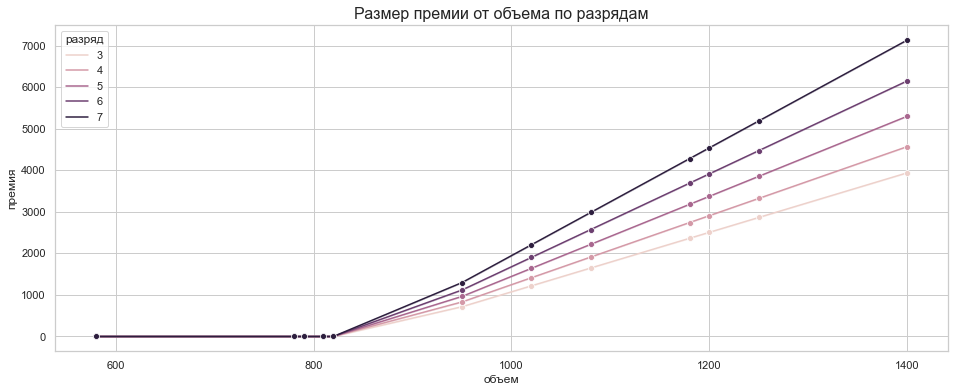

In [29]:
#palette = sns.color_palette("dark:salmon_r", 5)
plt.title('Размер премии от объема по разрядам', fontsize=16)
sns.lineplot(data=df, x='объем', y='премия', hue='разряд',  marker='o'); #palette=palette

Видно что до определенного значения объема (неизвестно) премия не выплачивается, а дальше для каждого разряда линейно растет при росте объема. Можно предположить что премия считается как оклад умноженный на величину превышения базового значения объема и коэффициент. В таком случае задача сводится к нахождению параметров прямой.

Для 3 разряда имеем 2 точки: 
* (1200, 2507.65) 
* (1400, 3940.59)

In [30]:
#прирост на единицу объема
(3940.59-2507.65)/(1400-1200)

7.1647

In [31]:
#доля от оклада
7.1647/12180*100

0.058823481116584565

In [32]:
#раз укладывается в оклад
12180/7.1647

1700.001395731852

Найдем базовое значение объема. Это точка принадлежащая прямой с премией = 0

В виде пропорции: 3940.59/(3940.59-2507.65)=(1400-X)/(1400-1200)

In [33]:
#Сдвиг по оси икс X=
1400-3940.59*200/(3940.59-2507.65)

849.999302134074

Получили что за каждую единицу объема свыше 850 работник 3 разряда получает премию в размере 7.1647 что соответствует 1/1700 его оклада.

Проверим для остальных месяцев и разрядов.

In [34]:
df['премия_расч'] = (df['объем']-850)*df['оклад']/1700
df.loc[df['премия_расч']<0, 'премия_расч']=0
#разница больше 0,008
df[abs(df['премия']-df['премия_расч'])>0.008]

,фио,месяц,профессия,разряд,оборудование,вредность,объем,доход,доход_минус_вред,коэф_надбавки,оклад,оклад_плюс_премия,премия,премия_расч
486,Гришин А. А.,7,Вальцовщик,7,Пилигримовые станы,18,1400,35356.764706,32116.76,1.1,22060.0,29197.05,7137.05,7137.058824
1518,Окулов Л. Н.,7,Вальцовщик,7,Пилигримовые станы,18,1400,35356.764706,32116.76,1.1,22060.0,29197.05,7137.05,7137.058824
1830,Сергеев Р. Е.,7,Вальцовщик,7,Прошивной стан,18,1400,35356.764706,32116.76,1.1,22060.0,29197.05,7137.05,7137.058824
2178,Филиппов И. П.,7,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,0,1400,32116.764706,32116.76,1.1,22060.0,29197.05,7137.05,7137.058824
2262,Чернов И. А.,7,Нагревальщик металла,7,Нагревательные печи,22,1400,36076.764706,32116.76,1.1,22060.0,29197.05,7137.05,7137.058824
2334,Шаповалов А. Р.,7,Нагревальщик металла,7,Нагревательные печи,22,1400,36076.764706,32116.76,1.1,22060.0,29197.05,7137.05,7137.058824


**Предварительный вывод:**  
За каждую единицу объема свыше 850 работник получает премию в размере 1/1700 его оклада

<a name="44"></a>
### Взаимосвязь окладов

In [35]:
jan_class_list

,список_значений,оклад
разряд,,
3,"[12180.0, 12789.0, 13398.0]",12180.0
4,"[14130.0, 14836.5, 15543.0]",14130.0
5,"[16390.0, 17209.5, 18029.0]",16390.0
6,"[19020.0, 19971.0, 20922.0]",19020.0
7,"[22060.0, 23163.0, 24266.0]",22060.0


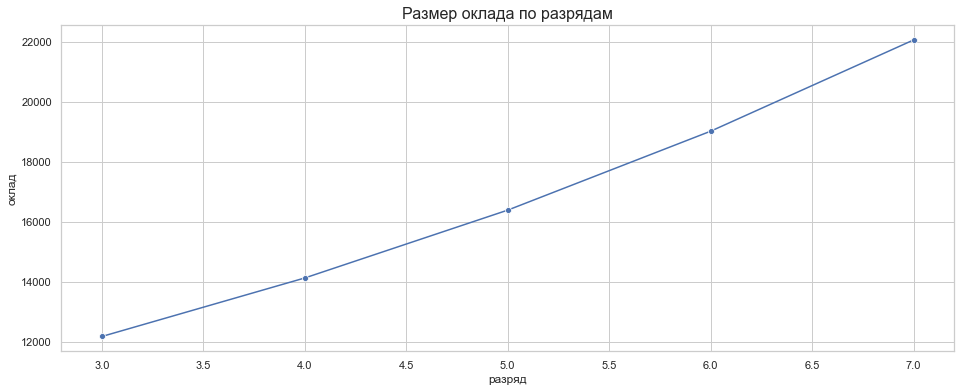

In [36]:
#palette = sns.color_palette("dark:salmon_r", 5)
plt.title('Размер оклада по разрядам', fontsize=16)
sns.lineplot(data=jan_class_list, x='разряд', y='оклад',  marker='o'); #palette=palette

Видно что зависимость оклада от разряда не линейна. Для учета заработной платы на промышленных предприятиях в 2009 году могла использоваться отраслевая тарифная сетка, включающая в себя базовую ставку и тарифные коэффициенты, соответствующие каждому разряду. Обратил внимание что каждый последующий разряд больше предыдущего приблизительно на 16%. Таким образом можно использовать следующую формулу: **12180*1,16^(r-3)** (где r-необходимый разряд) с последующим округлением до десятков в большую сторону.

<a name="5"></a>
## Итоговая формула
**Выявите формулу дохода в целом и его составных частей.**

В окончательном виде формула выглядит следующим образом:  
**доход = оклад + премия + надбавка + доплата**


**оклад = 12180 * 1,16^(r-3)** (где r-разряд сотрудника) с последующим округлением до десятков в большую сторону

**премия = оклад * (объем - 850)/1700** - только при объеме производства более 850  

**надбавка = (оклад + премия) * значение_надбавки** где индивидуальная характеристика работника соответствующая одному из 3 значений: 0; 0.05; 0.1

значение_надбавки | коэф_надбавки | надбавка |
:---: | :---: | :--- |
0,00 | 1,00 | нет |
0,05 | 1,05 | 5% от оклада и премии |
0,10 | 1,10 | 10% от оклада и премии |

**доплата = 180 * Вредность (балл.)**

**Выявите зависимости между составными частями дохода.**  
* Размер премии (при достижении базового значения объема производства) прямо пропорционален размеру оклада.  
* Размер надбавки линейно связан с суммой оклад+премия.
* Доплата рассчитывается самостоятельно и не зависит от других частей дохода. 

<a name="6"></a>
## Проверка
**Проверьте, что данная формула объясняет доход с точностью до рубля.**  

Для чистоты проверки перечитаем данные

In [37]:
df_test = pd.read_excel('Задание 5.0 2 версия.xlsx')
df_test = df_test[['FIO', 'Месяц', 'Разряд', 'Вредность (балл.)', 'Объем производства', 'Доход']]
df_test.set_axis(['фио', 'месяц', 'разряд', 'вредность', 'объем', 'доход'], axis=1, inplace=True)
df_test

,фио,месяц,разряд,вредность,объем,доход
0,Абрамов Е. Д.,2009-01-01,3,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,3,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,3,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,3,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,3,18,1250,19790.470588
...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,4,18,1180,21800.170588
2396,Яковлев Д. И.,2009-09-01,4,18,1080,20885.876471
2397,Яковлев Д. И.,2009-10-01,4,18,780,18783.000000
2398,Яковлев Д. И.,2009-11-01,4,18,1020,20337.300000


In [38]:
df_test['доход_расчетный'] = df_test.apply(income_calc, axis=1)
df_test['расхождение'] = abs(df_test['доход_расчетный'] - df_test['доход'])
display(df_test)
display(df_test['расхождение'].describe())

,фио,месяц,разряд,вредность,объем,доход,доход_расчетный,расхождение
0,Абрамов Е. Д.,2009-01-01,3,18,580,16638.000000,16638.000000,0.000000e+00
1,Абрамов Е. Д.,2009-02-01,3,18,790,16638.000000,16638.000000,0.000000e+00
2,Абрамов Е. Д.,2009-03-01,3,18,820,16638.000000,16638.000000,0.000000e+00
3,Абрамов Е. Д.,2009-04-01,3,18,1200,19396.411765,19396.411765,1.091394e-11
4,Абрамов Е. Д.,2009-05-01,3,18,1250,19790.470588,19790.470588,2.910383e-11
...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,4,18,1180,21800.170588,21800.170588,2.546585e-11
2396,Яковлев Д. И.,2009-09-01,4,18,1080,20885.876471,20885.876471,3.637979e-11
2397,Яковлев Д. И.,2009-10-01,4,18,780,18783.000000,18783.000000,3.637979e-12
2398,Яковлев Д. И.,2009-11-01,4,18,1020,20337.300000,20337.300000,3.637979e-12


count    2.400000e+03
mean     1.654901e-11
std      1.578392e-11
min      0.000000e+00
25%      0.000000e+00
50%      1.364242e-11
75%      3.274181e-11
max      5.093170e-11
Name: расхождение, dtype: float64

Начальные и расчетные значения совпадает с точностью до 11 знаков после запятой. При округлении до копеек получим полное совпадение.

<a name="7"></a>
## Заключение
Спасибо за интересную задачу и уделенное внимание.
В случае вашей заинтересованности с радостью рассмотрю любой из вариантов стажировки или трудоустройства.
Волонцевич Олег
+7 (915) 254-31-96 тел. / WhatsApp / Telegram